<a href="https://www.kaggle.com/code/cauandom/birdclef-2025-nias-ia-equipe-2-cauan?scriptVersionId=230860511" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="width:100%;text-align: center;"> <img align=middle src="https://media-gru1-2.cdn.whatsapp.net/v/t61.24694-24/301364236_913576792934575_4044621605564244544_n.jpg?ccb=11-4&oh=01_Q5AaIRq2Ex0Se0Y57rW4UGKOSWznKZ1vNm0jpEE5-78qhoZX&oe=67F3E265&_nc_sid=5e03e0&_nc_cat=103" alt="Heat beating" style="height:20px;margin-top:rem;"> </div>

<center> <span style="font-size:10px;"> Made through the outreach program NIAS-IA, Universidade Fderal de Viçosa </span> </center>

<center> <span style="font-size:40px;"> BirdCLEF+ 2025 </span> </center>
<center> <span style="font-size:15px;"> A proposition of intervention to the problem of identifying endangered species at El Silencio Natural Reserve through sound </span> </center>

<div style="width:100%;text-align: center;"> <img align=middle src="https://natura.org.co/wp-content/uploads/2024/07/reserva-biologica-el-silencio-fundacion-natura-colombia.webp" alt="Heat beating" style="height:300px;margin-top:rem;"> </div>

Made by student Cauan de Oliveira Mendonça.
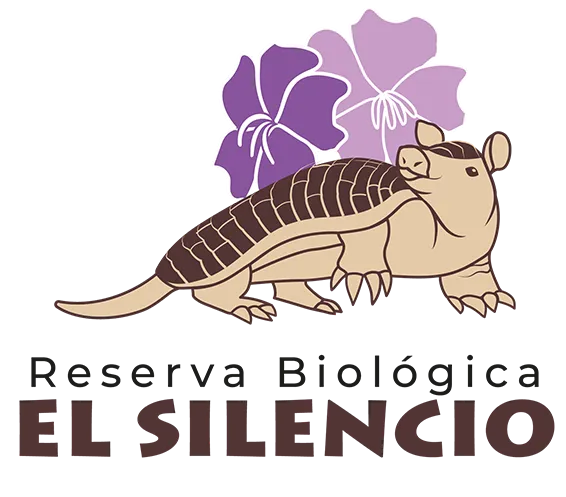
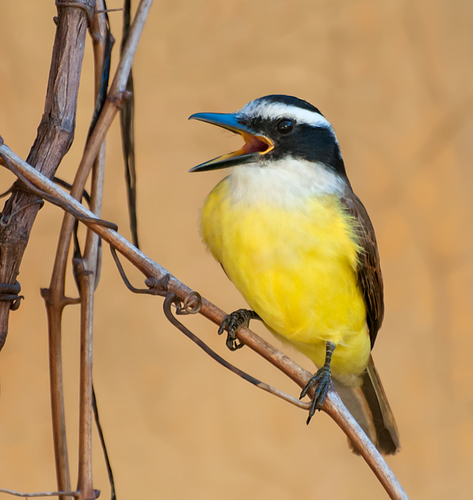

In [1]:
#Library importing

import os
import librosa
import numpy as np
import pandas as pd

#File importing

train_audio_path = '/kaggle/input/birdclef-2025/train_audio'
test_soundscape_path = '/kaggle/input/birdclef-2025/test_soundscapes'

#General configs

np.random.seed(0)

print('Setup completed :)')

Setup completed :)


# Submission

Submission was made based on the code suggested by expert `Stefan Kahl` in his notebook titled `"BirdCLEF+ 2025 Sample Submission"`

In [2]:
# Class labels from train audio
class_labels = sorted(os.listdir(train_audio_path))

# List of test soundscapes
test_soundscapes = [os.path.join(test_soundscape_path, afile)
 for afile in sorted(os.listdir(test_soundscape_path))
 if afile.endswith('.ogg')]

# Open each soundscape and make predictions for 5-second segments
# Use pandas df with 'row_id' plus class labels as columns
predictions = pd.DataFrame(columns=['row_id'] + class_labels)

for soundscape in test_soundscapes:

    # Load audio
    sig, rate = librosa.load(path=soundscape, sr=None)

    # Split into 5-second chunks
    chunks = []
    for i in range(0, len(sig), rate*5):
        chunk = sig[i:i+rate*5]
        chunks.append(chunk)
        
    # Make predictions for each chunk
    for i, chunk in enumerate(chunks):
        
        # Get row id  (soundscape id + end time of 5s chunk) 
        # Note to self: that f is a diffeent way of using format
        row_id = os.path.basename(soundscape).split('.')[0] + f'_{i * 5 + 5}'

        # Make prediction (let's use random scores for now)
        # scores = model.predict...
        # Note to self: this is a dummy to be substituted by the actual model predctions
        scores = np.random.rand(len(class_labels))

        # Append to predictions as new row
        new_row = pd.DataFrame([[row_id] + list(scores)], columns=['row_id'] + class_labels)

        # Create a the final, made to submit, dataframe
        predictions = pd.concat([predictions, new_row], axis=0, ignore_index=True)

# Save prediction as csv
predictions.to_csv('submission.csv', index=False)
display(predictions)

,row_id,1139490,1192948,1194042,126247,1346504,134933,135045,1462711,1462737,...,yebfly1,yebsee1,yecspi2,yectyr1,yehbla2,yehcar1,yelori1,yeofly1,yercac1,ywcpar
